# HOW2 

The following notebook will walk you through some basic python that will help you create triangles and graphs.
Make sure you **run all of the code blocks in the order they appear** in this notebook, as they can depend on each other.
I have tried to make the variable names as self explanatory as possible.

If a line starts with #, then it is a comment and will explain the code it surrounds.


## Imports
In the cell below, all that is happening is we are importing the packages we will be using in this tutorial 

In [ ]:
%matplotlib inline
import matplotlib
#from tabulate import tabulate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Where we have written e.g. ```import matplotlib.pyplot as plt``` all this means is we are importing it and renaming it under an alias we choose. This just makes our lives easier as when we want to call the function, we can just type ```plt``` instead of
the entire ```matplotlib.pyplot```

The ```%matplotlib inline``` allows us to view the graphs in this notebook

# Gross Premiums Received

In the section below, we will create triangles and graphs relating to the 'Gross Premiums Received' from the data in the data.csv file.

## Reading from a .csv File

In the cell below, we are reading the data in the .csv file into a DataFrame (using the ```pd.read_csv(FILENAME)``` function). A DataFrame is basically just a spreadsheet. You can name the DataFrame anything, in this example, we have chosen the variable name df.

By default, the ```.dropna()``` function returns a new DataFrame and removes any rows that contain NA values. The ```inplace = True``` is necessary to make the changes take place in **the same** DataFrame. Otherwise, you would have to reassign the variable, like: ```df = df.dropna()```. The option ```thresh=2``` defines a threshold. In this example, it deletes all rows that don't meet the threshold of having at least 2 non-NA values. 
If we didn't have this threshold, then all of the rows would be deleted, as the "unnamed" column contains an NaN value for each row. This is not the outcome we want.

We also don't want commas to be polluting our numbers so, to remove them, use ```df = df.replace(',','', regex = True)``` where the ```regex = True``` option will also replace commas inside substrings

The ```display(df)``` command will print a pretty table displaying the DataFrame.

In [ ]:
df = pd.read_csv('data.csv')

df.dropna(inplace = True, thresh = 2)

# we could also remove any column that contains any number of Na values > 0 (we still need to do the above command, otherwise 
# every column would be removed!)
df.dropna(axis='columns', inplace=True)


df.replace(',','', regex = True, inplace=True)

# here we just change the pandas settings so we can see all the rows in the tables. You can change it if you would like. 
# see what happens when you change None to 4 (make sure to change it back afterwards for the rest of the tutorial)
pd.set_option("display.max_rows", None)

display(df)

# an alternative to display() is print(tabulate(df, headers = 'keys', tablefmt = 'pretty')), if you want to use it, uncomment
# it in the imports and install it on your machine





## Altering the DataFrame

2013.0 is a strange way to write a year, lets force it to be written as 2013. In other words, lets convert the type of the "Underwriting YoA" column from type float to be of type int. All of the columns can be represented as integers, and it will be useful for future calculations if we cast them to int.

However, I'm also going to convert the "Processing Month" column to type string for a later exercise. This is so it is subscriptable (This will be explained in more detail in the section). I'm going to convert it to int first though, to get rid of the decimal.

In [ ]:
#convert every column to int
df = df.astype('int')

df['Processing Month'] = df['Processing Month'].astype('str')


#You could also do this one-by-one but its better to do the above
#df['Underwriting YoA'] = df['Underwriting YoA'].astype('int')
#df['Process year'] = df['Process year'].astype('int')
#df['Processing Month'] = df['Processing Month'].astype('int')

display(df)

## Displaying a triangle

### Creating a new dataFrame 

This DataFrame will contain only the columns we need. We will need to do some adjusting to the code before we can plot everything, as it doesn't look exactly as we need it to.
For example, as you can see in the 'Underwriting YoA' column, the years are repeated. This is not ideal as our aim is to display the data similarly to this (cropped image):
![](example_triangle.png)

### Extracting the data we need

We only need the two columns 'Underwriting YoA' and 'Gross Premiums Received' to create the gross premiums triangle. So we should create another DataFrame that only contains this.
We also need the amount of months after the underwriting year, but we can infer this from the 'Underwriting YoA' paired with the positioning in the DataFrame.  
  
The code might look like a lot, but its just because its heavily commented, there is actually only 14 lines of code (ignoring the 4 print statements).

In [ ]:
# here we are creating a new, smaller DataFrame, and storing only the 2 columns we need in it 
year_and_gross_premiums_received = df[['Underwriting YoA','Gross Premiums Received']].copy()

# uncomment the line below if you would like to see what the new DataFrame looks like
#display(year_and_gross_premiums_received)

#a variable that holds a list of the lengths of time in months after the underwriting years
length_of_time = []
# a variable that holds a list of the underwriting years
years = []

# a variable that holds the current year selected, so we are able to tell when it changes,
# here, to start with, we are setting it to be equal to the first value in the Underwriting YoA column
current_year_selected = year_and_gross_premiums_received['Underwriting YoA'][0]
years.append(current_year_selected)

# a variable to keep track of the number of iterations there has been for each year (which tells us the number of months
# after the underwriting year we have data for)
i = 0

# The below for loop iterates over each value in the Underwriting YoA column and, if the year has changed, it adds it 
# to the end of the list of years (using append(year)), it also adds i (explained above) to a list of the lengths of time
for year in year_and_gross_premiums_received['Underwriting YoA']:
    # != means "not equal"
    if current_year_selected != year:
        # we set "i" back to 0 as the year has changed, so we want to start measuring from 0 again
        length_of_time.append(i)
        i=0
        current_year_selected = year
        years.append(year)
    #we increment i outside of the above for loop as we want to keep track of the length of time when the year doesn't change
    i += 1
# we append once more, as the values of the last year won't have been caught by the if condition 
# this is because the year won't have changed again before the table ends 
length_of_time.append(i)
        
print("this is the list of lengths of time in months: " + str(length_of_time))
print("this is the list of years: " + str(years) + "\n")
print("if the list of lengths of time is confusing, look at the table we printed in the exercise before, and note that there ")
print("are 58 (inc 0) datapoints corresponding to 2013, and 46 to 2014 and so on.\n ")      

### More data!

Now, we need to associate the data from the 'Gross Premiums Received' column to the appropriate year and length of time in months.
We will do this by creating a dictionary of values where each key is the year, and each year's value is a list of the Gross Premium Received values corresponding to the amount of time in months that has elapsed since the underwriting year.

If you want to know more about dictionaries, look in the [python documentation here](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)

In [ ]:
# instantiate a new dictionary
years_gross_premiums_data = {}

# we will use j to keep track of the current index of the datapoint we need
j=0

# we are going to go through the years and create a dictionary where the key is the year and the value is a list of 
# all the values corresponding to that year in the 'Gross Premiums Received' column
for i, year in enumerate(years):
    ref_time_unit_list = []
    #for each year that has elapsed after the underwriting year (for each underwriting year)
    for time_unit in range(length_of_time[i]):
        ref_time_unit_list.append(int(year_and_gross_premiums_received['Gross Premiums Received'][j]))
        years_gross_premiums_data[year] = ref_time_unit_list
        #increment j
        j+=1

print("This is the dictionary we just created: \n" + str(years_gross_premiums_data))


### Convert the dictionary into a DataFrame

In order to convert the dictionary we just made into another DataFrame, all the arrays in the values need to be of the same length, so we will make them all as long as the longest array by padding the remaining length with NaN values.
We will also add a totals row and a totals column (similarly to the example) and then add these to the DataFrame.

In [ ]:
#first, find the size of the biggest array
largest_array_size = max(length_of_time)

# now we can pad with 0s (just because the arrays need to be the same size for us to convert it into a DataFrame) 
for year in years_gross_premiums_data:
    for i in range(largest_array_size - len(years_gross_premiums_data[year])):
        years_gross_premiums_data[year].append(np.nan)
    
# now we are able to convert the dictionary we built into a DataFrame, and display this
df_years_gross_prem = pd.DataFrame(years_gross_premiums_data) 

# I am keeping a copy of the data without the totals row and column for use in the graphs later
df1 = df_years_gross_prem.copy()

#we will add a 'Total' row
df_years_gross_prem.loc['Total1'] = df_years_gross_prem.sum(numeric_only = True, axis = 0)
#This will add a 'Total' column
df_years_gross_prem.loc[:,'Total2'] = df_years_gross_prem.sum(numeric_only = True, axis = 1)

display(df_years_gross_prem)

### Transposing the DataFrame

We want to display our table with the rows and columns the other way around. We can do this with one function: ```transpose()```.

In [ ]:
#we will transpose it to get the orientation we want
df_years_gross_prem = df_years_gross_prem.transpose()

display(df_years_gross_prem)

### Displaying all columns

The graph above might have limited your table and omitted some rows! If it did, and you want to view the whole table, you can easily do this by setting the ```pd.set_option("display.max_columns", NUMBER)``` to something high, or the value None.

In [ ]:
pd.set_option("display.max_columns", None)
display(df_years_gross_prem)

## Displaying Graphs

In this next section we will display the Gross Premiums as a graph similar to this (we won't let it drop down):
![](Gross_premiums_graph_example.png)

### Plot the graph

We just need to use two functions for this, since we already adjusted our DataFrame in the other exercise! If you use ```df.plot.line()``` it plots all the numerical columns as separate lines.

In [ ]:
# N.B. df1 is the DataFrame we used before, just without the totals row and column and without being transposed
ax = df1.plot.line()
# "print" the graph
plt.show()

### Add the axis labels, etc

You may want to clean up the graph a bit by adding axes labels and a title.  
It might also be worth changing the settings so all your graphs appear bigger.  
You may also want to be able to save the graph as an image.  
If you are struggling with this, or want to know more, the [matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) will help, and so will the [pandas.DataFrame.plot documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

In [ ]:
# makes our graph a little bit bigger
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize']=(10, 7)

# plot our DataFrame  
ax = df1.plot.line()

# create axes labels and title the graph
ax.set(xlabel='Time elapsed (months)', ylabel='Gross Premiums Received', title='Gross Premiums Received')

#If you want to display the y axis as $50M, you can create a function to do this (we can then call this later on)
def yaxisFormatting(x, y):
    return str('${:.0f}'.format(x/1000000) +'M')
                                      
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(yaxisFormatting))

# If you want to display the y axis in the form $50,000,000, comment out the line above and uncomment the line below
#plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

# this will save the graph as an image, search in the directory you are in and open it
plt.savefig('gross_prem_graph.png')

# if you wanted to plot multiple graphs in the same figure, this is also possible 
# if you wanted to display the graphs as next to each other, change fig, axes = plt.subplots(1,2)
fig1, axes = plt.subplots(2)

#setting a figure title
fig1.suptitle('DISPLAYING MULTIPLE GRAPHS:')

# im just plotting the same graph twice. If you want to plot different ones, change a df1 to the name of a different DataFrame
df1.plot(ax= axes[0]) 
df1.plot(ax= axes[1]) 

# "print" the graphs
plt.show()

# Gross Incurred Claims

Now, lets progress onto the Gross Incurred Claims column.    
Remember, the data.csv file is still stored in the DataFrame called df, so we don't need to read the file again.  

You may have noticed that a lot of the code we did in the previous sections is quite general, and we could repurpose a lot of it for this column.
Lets make some functions - these allow us to re-use code.

## Functions

We still will need to create the new DataFrame using the columns we need manually. The function we will make will do pretty much the exact same thing as what we did in the "Extracting the data we need" and the "More data!" sections for Gross Premiums Received. In addition to this though, it will also convert the dictionary we create into a DataFrame.  
Most of the code below should look familiar, I have just taken out the comments and introduced a few new variables to make it more general.

Any new piece of code will have a comment.

In [ ]:
# here we are creating a new, smaller DataFrame, and storing only the 2 columns we need in it 
year_and_gross_incurred = df[['Underwriting YoA','Gross Incurred Claims']].copy()

# uncomment the line below if you would like to see what the new DataFrame looks like
#display(year_and_gross_incurred)

# in this function, we create a new DataFrame, using a different DataFrame as a parameter (later, we will call the function
# with the year_and_gross_Incurred DataFrame we just made
def createTriangleDataFrame(originalDF):
    #The outlined block below is almost exactly the same as in the "Extracting the data we need" section
    #__________________________________________________________________________________________________________________________
    length_of_time = []
    years = []
    current_year_selected = originalDF['Underwriting YoA'][0]
    years.append(current_year_selected)
    i = 0
    for year in originalDF['Underwriting YoA']:
        if current_year_selected != year:
            length_of_time.append(i)
            i=0
            current_year_selected = year
            years.append(year)
        i += 1
    length_of_time.append(i)
    #__________________________________________________________________________________________________________________________
    #The outlined block of data below is almost the exact same as the "More data!" section 
    #__________________________________________________________________________________________________________________________
    originalDFDictionary = {}
    j=0
    for year in years:
        i = years.index(year)
        ref_time_unit_list = []
        #the line below is new, basically we are just extracting the name of the desired column from the DataFrame
        target_column = originalDF.columns.values.tolist()[1]
        for time_unit in range(length_of_time[i]):
            ref_time_unit_list.append(int(originalDF[target_column][j]))
            originalDFDictionary[year] = ref_time_unit_list
            j+=1
    #__________________________________________________________________________________________________________________________
    #The outlined block of data below is almost the exact same as the first half of the "Convert the dictionary into a DataFrame"
    #__________________________________________________________________________________________________________________________
    temp_array = length_of_time.copy()
    temp_array.sort()
    largest_array_size = temp_array[len(temp_array)-1]
    for year in originalDFDictionary:
        for i in range(largest_array_size - len(originalDFDictionary[year])):
            originalDFDictionary[year].append(np.nan)
    # a function returns exactly one thing. We are returning our updated DataFrame        
    return pd.DataFrame(originalDFDictionary)
    #__________________________________________________________________________________________________________________________


# we assign the return value from our createTriangleDataFrame function and assign it to a new variable
df_year_and_gross_incurred = createTriangleDataFrame(year_and_gross_incurred)
display(df_year_and_gross_incurred)

# if you want to prove to yourself it does the same as the other one (remember this is before we transpose it!) comment out the 
# 2 lines above and uncomment the 2 lines below to see it work for Gross Premiums Received

#df_year_and_gross_premiums_received = createTriangleDataFrame(year_and_gross_premiums_received)
#display(df_year_and_gross_premiums_received)


## Transposing and totals function

Lets create another function that will take a DataFrame as input, insert the totals columns and transpose it.

In [ ]:
def totalsAndTranspose(originalDF): 
    #create a new DataFrame, so we can still use the original without totals for graphing
    copyDF = originalDF.copy()
    #we will add a 'Total' row
    copyDF.loc['Total1'] = copyDF.sum(numeric_only = True, axis = 0)
    #This will add a 'Total' column
    copyDF.loc[:,'Total2'] = copyDF.sum(numeric_only = True, axis = 1)
    #we will transpose it to get the orientation we want
    return copyDF.transpose()

#call the function we just created with df_year_and_gross_incurred
display(totalsAndTranspose(df_year_and_gross_incurred))

##  Displaying Graphs Again

The below is very similar to the section inside Gross Premiums Received.  
See if you can save the figure as an image called "gross_incurred_graph.png"

In [ ]:
# plot our DataFrame  
ax = df_year_and_gross_incurred.plot.line()

# create axes labels and title the graph
ax.set(xlabel='Time elapsed (months)', ylabel='Gross Incurred Claims', title='Gross Incurred Claims')

#change the format of the labels on the y axis
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(yaxisFormatting))

#save the figure as an image below this comment (before plt.show())

plt.show()

# Gross Paid Claims

Now, lets progress onto displaying the triangle and graph for the Gross Paid claims column.

This should be easy with our functions! :)

In [ ]:
# get the columns we need
year_and_gross_paid = df[['Underwriting YoA','Gross Paid Claims']].copy()

# use the functions we made before
df_year_and_gross_paid = createTriangleDataFrame(year_and_gross_paid)
display(totalsAndTranspose(df_year_and_gross_paid))

#create a graph
ax = df_year_and_gross_paid.plot.line()
ax.set(xlabel='Time elapsed (months)', ylabel='Gross Paid Claims', title='Gross Paid Claims')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(yaxisFormatting))
plt.show()

# Creating Pivot Tables

Lets move on and create pivot tables for each of the columns we worked with before. We will be using a built in pandas function that will be much quicker than what we did before. 

# Gross Premiums Received

We want to create a pivot table with the Underwriting YoA against the Development period. 

## Finding the development periods
The development period values are held in another column in our DataFrame, but as an extra challenge, lets instead infer it from the processing months. The development period will be the current Processing Month minus the last Processing Month. It also needs to restart from 0 for every new underwriting year.

At the very beginning of this HOW2, we converted the "Processing Month" from a float to a string. We did this so we could do something called [string slicing](https://www.digitalocean.com/community/tutorials/how-to-index-and-slice-strings-in-python-3). It means you can extract a substring from a string. This will allow us to very easily extract the month from the value, as it is formatted like this: "201301". 

In [ ]:
# creating a DataFrame with the 3 columns we will need
gross_prems_piv= df[['Underwriting YoA','Processing Month','Gross Premiums Received']].copy()

#variables to hold a list of the years, and the months

prev_year = df['Underwriting YoA'][0]
#print(year +" from " + df['Processing Month'][0])
months = []
base = 0
prev_month = 0

for i, process_month in enumerate(df['Processing Month']):
    # using string slicing to extract the month from the process_month (remember it's of the format YYYYMM)
    month = int(process_month[4:6])
    year = df['Underwriting YoA'][i]
    
    # restart the base for every new underwriting year
    if year != prev_year:
        prev_year = year
        base = i  
        
    #if its the first development period of the year, start the base at 0 again
    if (i - base) == 0:
        months.append(month)
        
    #if the previous month was december and now its jan, we dont want to add (1-12), we want to add (13-1)
    elif prev_month > month:
        difference = (month + 12) - prev_month
        months.append(months[i-1] + difference)
        
   # otherwise add the difference between months
    else:
        difference = month - prev_month
        months.append(months[i-1] + difference)
    prev_month = month
    
    
# add the resulting list as a column in our DataFrame 
gross_prems_piv['Development period'] = months

# lets check if our column is correct using .equals with the Development period column in the original DataFrame
print("They are the same: " + str(gross_prems_piv['Development period'].equals(df['Development period'])))

## We can be more efficient...

Lets find the development period using vector calculations instead. The formula we want to use is: (Processing year - Underwriting YoA) *12 + Processing month

We can start by splitting Processing Month into two columns: Processing Year and Processing Month.

In [ ]:
# creating a DataFrame with the 3 columns we will need
vec_gross_prems_piv= df[['Underwriting YoA','Processing Month','Gross Premiums Received']].copy()

# making'Processing Month' into 2 columns: 'Processing Month' and 'Processing Year'
# using a built in function str to string slice every value in column aand then converting it to integers again
# so we can use the values in our calculations
vec_gross_prems_piv['Processing Year'] = vec_gross_prems_piv['Processing Month'].str[:4].astype('int')
vec_gross_prems_piv['Processing Month'] = vec_gross_prems_piv['Processing Month'].str[4:6].astype('int')

#using our formula to create a new column containing the development periods
vec_gross_prems_piv['Development period'] = (vec_gross_prems_piv['Processing Year']-vec_gross_prems_piv['Underwriting YoA'])*12 + vec_gross_prems_piv['Processing Month']

# lets check if our new column is the same as in the original DataFrame
print("They are the same: " + str(vec_gross_prems_piv['Development period'].equals(df['Development period'])))

## Creating the pivot table

Theres a built in function in pandas for this!

In [ ]:
table_gross_prems = pd.pivot_table(vec_gross_prems_piv, values='Gross Premiums Received', index=['Underwriting YoA'],
                    columns=['Development period'])

display(table_gross_prems)

# Gross Incurred Claims

## Creating the pivot table

Lets create a pivot table for Gross Incurred claims! this should be easy, given that we have already worked out the Development period, and can append this to a new DataFrame

In [ ]:
# create our dataframe 
gross_inc_piv= df[['Underwriting YoA','Processing Month','Gross Incurred Claims']].copy()

# making'Processing Month' into 2 columns: 'Processing Month' and 'Processing Year' 
gross_inc_piv['Processing Year'] = gross_inc_piv['Processing Month'].str[:4].astype('int')
gross_inc_piv['Processing Month'] = gross_inc_piv['Processing Month'].str[4:6].astype('int')

#using our formula to create a new column containing the development periods
gross_inc_piv['Development period'] = (gross_inc_piv['Processing Year']-gross_inc_piv['Underwriting YoA'])*12 + gross_inc_piv['Processing Month']

# create our pivot table
table_gross_inc = pd.pivot_table(gross_inc_piv, values='Gross Incurred Claims', index=['Underwriting YoA'],
                  columns=['Development period'])

display(table_gross_inc)

# Gross Paid Claims

## Creating the pivot table

For the last example, I wont use the development period we calculated, and will instead use the original values from the dataframe (even though they are the exact same). 

In [ ]:
# create our dataframe 
gross_paid_piv= df[['Underwriting YoA','Processing Month','Gross Paid Claims', 'Development period']].copy()
# create our pivot table
table_gross_paid = pd.pivot_table(gross_paid_piv, values='Gross Paid Claims', index=['Underwriting YoA'],
                   columns=['Development period'])

display(table_gross_paid)

# Creating graphs from the pivot tables

## Gross Premiums Received
We'll once again start with Gross Premiums Received.

We can't just straight away plot the pivot table using .plot.line() because it will plot the wrong indexes, we want to transpose it first. If you want further explanation, read the [documentation for .plot.line()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html) 

In [ ]:
#transpose the table so it plots the graph how we would like (the correct x and y axis etc)
# if you want to see what it looks like if we didnt transpose it, remove the .transpose() from the line below
ax = table_gross_prems.transpose().plot.line()

#change axis labels
ax.set(xlabel='Development period', ylabel='Gross Premiums Received', title='Gross Premiums Received')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(yaxisFormatting))
plt.show()

## Gross Incurred Claims

Its the exact same to plot the data from the other pivot tables.

In [ ]:
#transpose the table so it plots the graph how we would like
ax = table_gross_inc.transpose().plot.line()

#change axis labels
ax.set(xlabel='Development period', ylabel='Gross Incurred Claims', title='Gross Incurred Claims')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(yaxisFormatting))
plt.show()

## Gross Paid Claims

In [ ]:
#transpose the table so it plots the graph how we would like
ax = table_gross_paid.transpose().plot.line()

#change axis labels
ax.set(xlabel='Development period', ylabel='Gross Paid Claims', title='Gross Paid Claims')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(yaxisFormatting))
plt.show()

# What to do if your data isn't cumulative

We have the file where the data is not cumulative: claims2.csv. In this section, we will adjust the data until it is.

In [ ]:
df2 = pd.read_csv('claims2.csv')

df2.dropna(inplace = True, thresh = 2)
df2.replace(',','', regex = True, inplace=True)
#convert the Gross Premiums Received, Gross Paid Claims, Gross Incurred Claims columns to int
df2[['Gross Premiums Received', 'Gross Paid Claims', 'Gross Incurred Claims']] = df[['Gross Premiums Received', 
                                                                                     'Gross Paid Claims', 
                                                                                     'Gross Incurred Claims']].astype('int')

pd.set_option("display.max_rows", None)
display(df2)

You can make a column cumulative by using the function cumsum(). We want to be more specific and want each year to have an individual cumulative sum. We can achieve this by using the groupby() function.

In [ ]:
# you can see what the groupby() function does by uncommenting the line below
#display(df2.groupby(['Underwriting YoA'])['Gross Premiums Received'].count())

df2['Gross Premiums Received'] = df2.groupby(['Underwriting YoA'])['Gross Premiums Received'].cumsum()
df2['Gross Paid Claims'] = df2.groupby(['Underwriting YoA'])['Gross Paid Claims'].cumsum()
df2['Gross Incurred Claims'] = df2.groupby(['Underwriting YoA'])['Gross Incurred Claims'].cumsum()
display(df2)

# Expectations graph

In [ ]:
df3 = vec_gross_prems_piv.copy()

#remove unecessary columns
df3.drop(['Processing Year', 'Processing Month'], axis =1, inplace = True)

#we need every 3rd month, so will remove rows if the development period is not divisible by 3 
df3 = df3[(df3['Development period'] % 3 == 0)]

# a dictionary containing the number of years that have each development period
year_list = df3.groupby(['Development period'])['Underwriting YoA'].apply(list).to_dict()

#a list containing the names of the different years in the list i.e. [2013, 2014, 2015, 2016, 2017]
year_name_list= df3['Underwriting YoA'].unique()

# a list of the unqique development periods in the column i.e. [3,6,9,12 ...]
devprd_list = df3['Development period'].unique().tolist()

# keeping the values in lists as these will become the columns of our dataframe
development_factor_list = []
numerators = []
denominators = []

numerator = 0
# set the initial denominator to the value of the first columns sum 
denominator = df3.loc[df3['Development period']==devprd_list[0],'Gross Premiums Received'].sum()

numerators.append(np.nan)
denominators.append(np.nan)

for i, devprd in enumerate(devprd_list): 
    # we want to ignore the first value as the development factor relies on the datapoint before it
    if devprd != devprd_list[0]:
        # the numerator is equal to the sum of all the rows where the development period is the same
        numerator = df3.loc[df3['Development period']==devprd,'Gross Premiums Received'].sum()
        # if the dev periods dont have data for corresponding years
        if year_list[devprd] !=  year_list[devprd_list[i-1]]:
            # a set of the common years between the development periods
            common_years = set(year_list[devprd]) & set(year_list[devprd_list[i-1]])
            numerator = 0
            denominator = 0
            for j in common_years:
                #set the appropriate numerator and denominator for the datapoints in the common set of years
                numerator = numerator + df3.loc[((df3['Development period']==devprd) &(df3['Underwriting YoA']==j))]['Gross Premiums Received'].tolist()[0]
                denominator = denominator + df3.loc[((df3['Development period']==devprd_list[i-1]) &(df3['Underwriting YoA']==j))]['Gross Premiums Received'].tolist()[0]
        development_factor_list.append(numerator/denominator)
        numerators.append(numerator)
        denominators.append(denominator)
        denominator = numerator

# we insert NaN for the first devprd because we have no denominator value for it -> so it wont have a development factor
development_factor_list.insert(0, np.nan)
df3new = pd.DataFrame()
    
df3new['Development period'] = devprd_list
df3new['Number of data points'] = [len(k) for k in year_list.values()]
df3new['Numerator'] = numerators
df3new['Denominator'] = denominators
df3new['Development factor'] = development_factor_list
display(df3new)

# Finding development percentages


In [ ]:
# overall development factor product
overall_devprod = df3new['Development factor'].product()

# get the cumulative product for each value then divide by the value of the overall product
dev_pcnt = df3new['Development factor'].cumprod().div(overall_devprod).tolist()

# append the new column onto the DataFrame
df3new['Development percentages'] = dev_pcnt

display(df3new)


# Development percentages with picked values

Since these are picked manually, we will just select an index after which will be set to 100% (1). In this case, we have chosen every value after index 11.

In [ ]:
# copy development percentages
dev_pcnt_with_pick = df3new['Development percentages'].copy().tolist()

# append to the DataFrame
df3new['Development percentages with pick'] = dev_pcnt_with_pick

# replace all values after a certain index (we have picked 11) with 1
df3new.loc[11:, 'Development percentages with pick'] = 1

# also add the value for the first column manually, we want this to be dev pct / dev factor of the next row
df3new.loc[0,'Development percentages with pick'] =  df3new.loc[1,'Development percentages']/df3new.loc[1,'Development factor']

display(df3new)

# new table 

We will use the [last_valid_index()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.last_valid_index.html) function to find the latest development period. 

This is also a [good stack overflow post](https://stackoverflow.com/questions/40583482/getting-last-non-na-value-across-rows-in-a-pandas-dataframe) to understand whats happening with indexing the last non-NaN value.

In [ ]:
# instantiate the new DataFrame
df4 = pd.DataFrame()

# inserting the years as a column
df4['Underwriting YoA'] = year_name_list

# adapted from the referenced stack overflow post
# this function returns the last valid non na value in the referenced row
def getPremsReceived(x):
    return x[x.last_valid_index()]

# Find the latest development period for each year (from our old pivot table)
latest_dev_prd = table_gross_prems.apply(pd.Series.last_valid_index, axis=1).tolist()
df4['Latest development period'] = latest_dev_prd

#.apply(axis = 1) means apply the function to each row
df4['Premiums Received'] = table_gross_prems.apply(getPremsReceived, axis=1).tolist()

devPcnt = []

#find the corresponding premiums developed % (with pick) from the last DataFrame we made 
for i in latest_dev_prd:
    # converting the value to float before adding into the df4 
    devPcnt.append(float(df3new.loc[((df3new['Development period']==i))]['Development percentages with pick'].tolist()[0]))

# add the list we just made into a new column in our DataFrame
df4['% premiums developed'] = devPcnt
    
df4['Ultimate premiums'] = df4['Premiums Received'] / df4['% premiums developed']



display(df4)

# Table with Gross Premiums Received / Ultimate premiums



In [ ]:
# take just the data we need from the other columns
df5 = df3.copy()

# A copy of df4 containing the columns we need, so we can add the ultimate premiums onto our new table
df4copy = pd.DataFrame()
df4copy[['Underwriting YoA', 'Ultimate premiums']] = df4[['Underwriting YoA', 'Ultimate premiums']].copy()

# merge the two DataFrames. This essentially will just add the Ultimate premiums values into another column depending on
# the value in the Underwriting YoA column
df5 = df5.merge(df4copy, on = 'Underwriting YoA', how='left')

# Another column that is the result of Gross Premiums Received/ Ultimate premiums
df5['Percentage gross prems'] = df5['Gross Premiums Received']/df5['Ultimate premiums']

# we dont want the gross premiums received column anymore, so remove it
df5.drop(['Gross Premiums Received'], axis =1, inplace =True) 

# convert the result to a pivot table
pivdf5 = pd.pivot_table(df5, values ='Percentage gross prems', index = df5['Underwriting YoA'], columns = df5['Development period'])

display(pivdf5)

# Plotting the Expectations Graph

This time, we will add an extra line that is not already in the dataframe to represent the selected pattern. We will make this line thicker and dashed so it stands out.

In [ ]:
#plot the graph, and make the linewidth of the lines other than the selected pattern smaller
ax = pivdf5.transpose().plot.line(linewidth=0.75)

#change axis labels
ax.set(xlabel='Development period')

# we want to also display the selected pattern from df3new 
selected_pattern = df3new['Development percentages with pick'].tolist()

# add the extra line for our selected pattern. k-- makes it black and dashed so its easier to differentiate between the lines
plt.plot(devprd_list, selected_pattern, 'k--', label = 'Selected Pattern')

# a new formatting function we can use to display the axis scale as percentages
def ypercentformat(x,y):
    return str('{:.2f}'.format(x*100) + '%')

# since we added an extra line we have to manually add the legend
ax.legend()
    
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(ypercentformat))

plt.show()

# Create a function that outputs both graphs!

We will create multiple subfunctions as it is better to make your code more modular. This is because it makes debugging easier and it aids readability.

None of the code is brand new, but some has been slightly adapted to be more general. An example of this would be df2['% ' + column_name +  ' developed'] instead of df2['% premiums developed]. This is so it can be relevant for all the other possible column names.

To prove this function works on it's own, go to kernel in the navigation bar, and select restart and clear output. Then run only this code block and below.

,Development period,Number of data points,Numerator,Denominator,Development factor,Development percentages,Development percentages with pick
0,3,5,NaN,NaN,NaN,NaN,NaN
1,6,5,68025869.0,38919136.0,1.747877,0.280748,0.280748
2,9,5,110370622.0,68025869.0,1.622480,0.455508,0.455508
3,12,5,140509423.0,110370622.0,1.273069,0.579893,0.579893
4,15,4,140814124.0,113777788.0,1.237624,0.717690,0.717690
5,18,4,159021550.0,140814124.0,1.129301,0.810488,0.810488
6,21,4,172861271.0,159021550.0,1.087030,0.881025,0.881025
7,24,4,185794483.0,172861271.0,1.074818,0.946942,0.946942
8,27,3,145488229.0,141607493.0,1.027405,0.972893,0.972893
9,30,3,146966998.0,145488229.0,1.010164,0.982782,0.982782


Looking at the table above, pick the index including which you would like to be 100%: 11


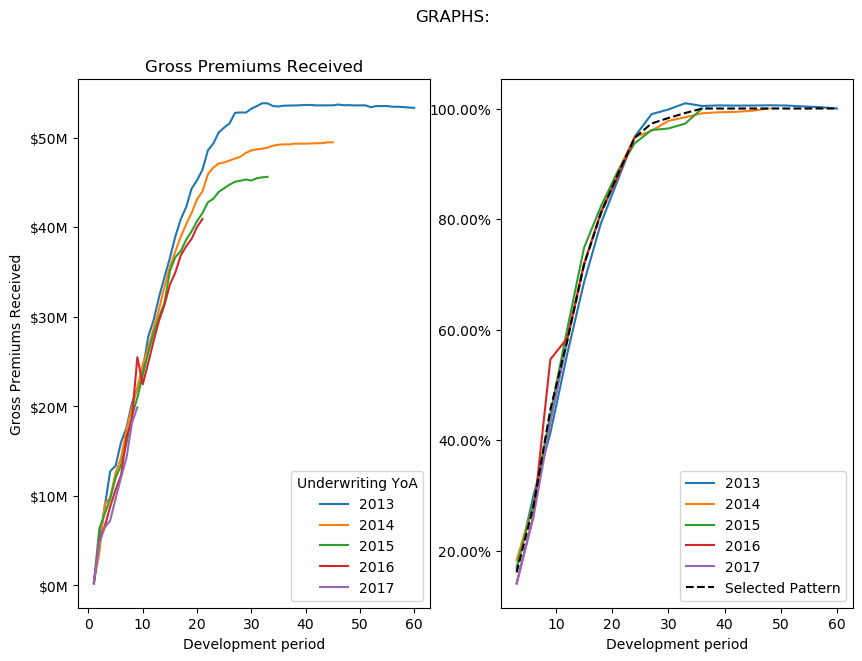

In [5]:
%matplotlib inline
import matplotlib
#from tabulate import tabulate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv')
df.dropna(inplace = True, thresh = 2)
df.dropna(axis='columns', inplace=True)
df.replace(',','', regex = True, inplace=True)
pd.set_option("display.max_rows", None)
df = df.astype('int')
df['Processing Month'] = df['Processing Month'].astype('str')


#If you want to display the y axis as $50M, you can create a function to do this (we can then call this later on)
def yaxisFormatting(x, y):
    return str('${:.0f}'.format(x/1000000) +'M')

# a new formatting function we can use to display the axis scale as percentages
def ypercentformat(x,y):
    return str('{:.2f}'.format(x*100) + '%')

# this function returns the last valid non na value in the referenced row
def getLastNonNA(x):
    return x[x.last_valid_index()]

# makes our graphs a little bit bigger
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize']=(10, 7)

# This function creates the pivot table (and causes a domino effect that calls all the other functions)
def createGraphs(df, column_name):
    df_piv_data= df[['Underwriting YoA','Processing Month', column_name]].copy()
    df_piv_data['Processing Year'] = df_piv_data['Processing Month'].str[:4].astype('int')
    df_piv_data['Processing Month'] = df_piv_data['Processing Month'].str[4:6].astype('int')
    df_piv_data['Development period'] = (df_piv_data['Processing Year']-df_piv_data['Underwriting YoA'])*12 + df_piv_data['Processing Month']
    piv_table = pd.pivot_table(df_piv_data, values=column_name, index=['Underwriting YoA'],
                    columns=['Development period'])
    buildExpectationsTables(df, column_name, df_piv_data, piv_table)
"""
#This function plots the 'Gross premiums received' / 'Gross Incurred Claims' etc graphs
def plotGrossColumnGraph(df, column_name):
    ax = df.transpose().plot.line()
    ax.set(xlabel='Development period', ylabel=column_name, title=column_name)
    plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(yaxisFormatting))
    plt.show()"""
    
# This function starts the (longer) process of building the expectations graph
def buildExpectationsTables(df, column_name, df_piv_data, piv_table):
    df1 = df_piv_data.copy()
    df1.drop(['Processing Year', 'Processing Month'], axis =1, inplace = True)
    df1 = df1[(df1['Development period'] % 3 == 0)]
    year_list = df1.groupby(['Development period'])['Underwriting YoA'].apply(list).to_dict()
    year_name_list= df1['Underwriting YoA'].unique()
    devprd_list = df1['Development period'].unique().tolist()
    development_factor_list, numerators, denominators = [],[],[]
    numerator = 0
    denominator = df1.loc[df1['Development period']==devprd_list[0],column_name].sum()
    numerators.append(np.nan)
    denominators.append(np.nan)
    for i, devprd in enumerate(devprd_list): 
        if devprd != devprd_list[0]:
            numerator = df1.loc[df1['Development period']==devprd,column_name].sum()
            if year_list[devprd] !=  year_list[devprd_list[i-1]]:
                common_years = set(year_list[devprd]) & set(year_list[devprd_list[i-1]])
                numerator = denominator = 0
                for j in common_years:
                    numerator = numerator + df1.loc[((df1['Development period']==devprd) &(df1['Underwriting YoA']==j))][column_name].tolist()[0]
                    denominator = denominator + df1.loc[((df1['Development period']==devprd_list[i-1]) &(df1['Underwriting YoA']==j))][column_name].tolist()[0]
            development_factor_list.append(numerator/denominator)
            numerators.append(numerator)
            denominators.append(denominator)
            denominator = numerator
    development_factor_list.insert(0, np.nan)
    df1new = pd.DataFrame()
    df1new['Development period'] = devprd_list
    df1new['Number of data points'] = [len(k) for k in year_list.values()]
    df1new['Numerator'] = numerators
    df1new['Denominator'] = denominators
    df1new['Development factor'] = development_factor_list
    devPcntWithPick(df,column_name, df1, df1new , year_name_list, piv_table, devprd_list)

# adds a new column to our dataframe, and asks for user input for picking percentages
def devPcntWithPick(df, column_name, df1, df1new, year_name_list, piv_table, devprd_list):    
    overall_devprod = df1new['Development factor'].product()
    dev_pcnt = df1new['Development factor'].cumprod().div(overall_devprod).tolist()
    df1new['Development percentages'] = dev_pcnt    
    dev_pcnt_with_pick = df1new['Development percentages'].copy().tolist()
    df1new['Development percentages with pick'] = dev_pcnt_with_pick
    display(df1new)
    pickNum = input("Looking at the table above, pick the index including which you would like to be 100%: " )
    df1new.loc[pickNum:, 'Development percentages with pick'] = 1
    df1new.loc[0,'Development percentages with pick'] =  df1new.loc[1,'Development percentages']/df1new.loc[1,'Development factor']
    createNewTable(df, column_name, df1, df1new, year_name_list, piv_table, devprd_list)

#creates the new table that contains some ultimate information 
def createNewTable(df, column_name, df1, df1new, year_name_list, piv_table, devprd_list):
    df2 = pd.DataFrame()
    df2['Underwriting YoA'] = year_name_list
    latest_dev_prd = piv_table.apply(pd.Series.last_valid_index, axis=1).tolist()
    df2['Latest development period'] = latest_dev_prd
    df2[column_name] = piv_table.apply(getLastNonNA, axis=1).tolist()
    devPcnt = []
    for i in latest_dev_prd:
        devPcnt.append(float(df1new.loc[((df1new['Development period']==i))]['Development percentages with pick'].tolist()[0]))
    df2['% ' + column_name +  ' developed'] = devPcnt
    df2['Ultimate ' + column_name] = df2[column_name] / df2['% '+ column_name +' developed']
    ultimateTable(df, column_name,piv_table, df1, df1new, df2, devprd_list)

#creates the final pivot table that the graph will ultimately be created from
def ultimateTable(df, column_name, piv_table, df1, df1new, df2, devprd_list):
    df3= df1.copy()
    df2copy = pd.DataFrame()
    df2copy[['Underwriting YoA', 'Ultimate ' + column_name]] = df2[['Underwriting YoA', 'Ultimate ' + column_name]].copy()
    df3 = df3.merge(df2copy, on = 'Underwriting YoA', how='left')
    df3['Percentage ' +column_name] = df3[column_name]/df3['Ultimate '+ column_name]
    df3.drop([column_name], axis =1, inplace =True)   
    pivdf3 = pd.pivot_table(df3, values ='Percentage ' +column_name , index = df3['Underwriting YoA'], columns = df3['Development period'])
    plotBothGraphs(piv_table,column_name, pivdf3,df1new, devprd_list)
    
#plots both of the graphs 
def plotBothGraphs(piv_table,column_name, pivdf3, df1new, devprd_list):
    fig1, axes = plt.subplots(1, 2)

    #setting a figure title
    fig1.suptitle('GRAPHS:')

    # im just plotting the same graph twice. If you want to plot different ones, change a df1 to the name of a different DataFrame
    piv_table.transpose().plot(ax = axes[0]) 
    pivdf3.transpose().plot(ax = axes[1]) 

    #plot the first graph
    # ax1= piv_table.transpose().plot.line()
    axes[0].set(xlabel='Development period', ylabel=column_name, title=column_name)
    axes[0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(yaxisFormatting))
    
    #plot the expectations graph
    # ax2 = pivdf3.transpose().plot.line(linewidth=0.75)
    axes[1].set(xlabel='Development period')
    selected_pattern = df1new['Development percentages with pick'].tolist()
    plt.plot(devprd_list, selected_pattern, 'k--', label = 'Selected Pattern')
    axes[1].legend()
    axes[1].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(ypercentformat))
    plt.show()
    
createGraphs(df, 'Gross Premiums Received')

# Calling the function

In [ ]:
createGraphs(df, 'Gross Premiums Received')
createGraphs(df, 'Gross Incurred Claims')
createGraphs(df, 'Gross Paid Claims')